# Typical intaerview questions

![concept](main_questions.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(1)

# Normal distribution



Some examples of observations that have a Gaussian distribution include:

* People’s heights.

* IQ scores.

* Body temperature.

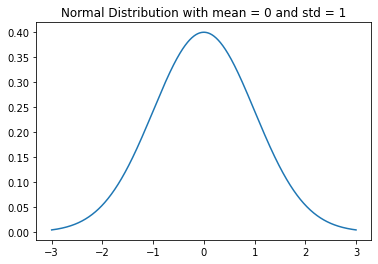

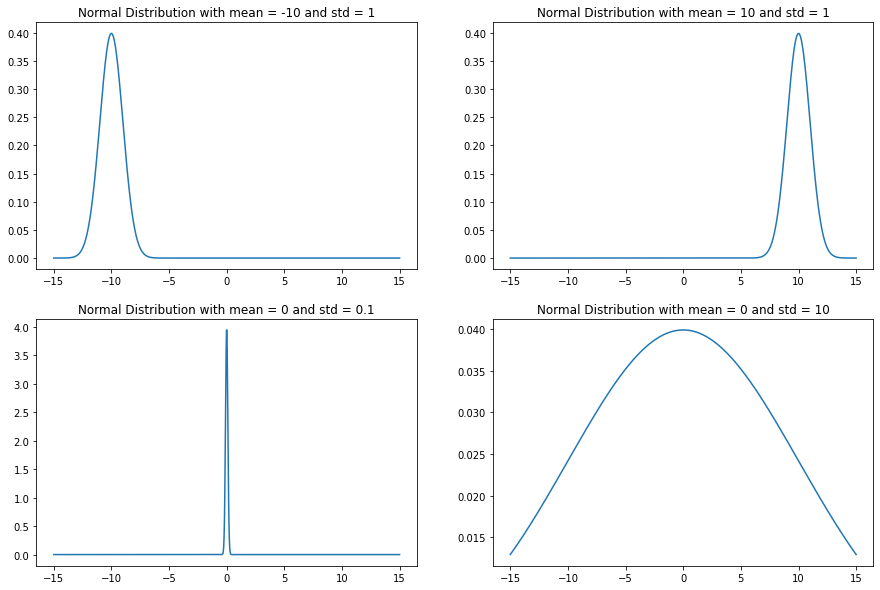

In [2]:
x = np.linspace(-3, 3, 1000)
_normal_pdf = norm.pdf(x, 0, 1)

plt.plot(x, _normal_pdf)
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.plot()


means_stds = [(-10, 1), (10, 1), (0, 0.1), (0, 10)]
x = np.linspace(-15, 15, 1000)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, mean_std in zip(axes.flatten(), means_stds):
    
    mean, std = mean_std
    _pdf = norm.pdf(x, mean, std)
    ax.plot(x, _pdf)
    ax.set_title(f'Normal Distribution with mean = {mean} and std = {std}')


# Mean, mode, variance

* Data Sample: A subset of observations from a group.
* Data Population: All possible observations from a group.

The **mean** of a sample is calculated as the sum of the
observations divided by the total number of observations in the sample. The mean is easily influenced by outlier values, that is, rare values far from the mean.


The **median** is calculated by first sorting all data
and then locating the middle value in the sample. This is straightforward if there is an odd
number of observations. If there is an even number of observations, the median is calculated
as the average of the middle two observations. 


The **variance** of a distribution refers to how much on average that observations vary or differ
from the mean value.  A low variance will have values grouped around the mean (e.g. a narrow bell
shape), whereas a high variance will have values spread out from the mean (e.g. a wide bell
shape.)


The **mode** is the value that appears most often in a set of data values. If X is a discrete random variable, the mode is the value x at which the probability mass function takes its maximum value (```i.e, x=argmax _xi {P(X = xi) } ```). In other words, it is the value that is most likely to be sampled.

![mean_mode_median](mean_mode_median.jpg)

In [122]:
def mean(x):
    return np.sum(x) / len(x)

def median(x):
    n = len(x)
    x = sorted(x)
    
    if n % 2 == 0:
        median_ind = int(n / 2)
        median = (x[median_ind - 1] + x[median_ind]) / 2
        
    else:
        median_ind = (n // 2) 
        median = x[median_ind]
        
    return median


def varience(x):
    _mean = mean(x)
    n = len(x)
    return np.sum((x - _mean) ** 2) / (n - 1)

def _mode(x, numpy=True):
    if numpy:
        values, counts = np.unique(x, return_counts=True)
        return values[np.argmax(counts)]
        
    else:
        sort_x = sorted(x)
        diff_x = [curr - sort_x[ind-1] for ind, curr in enumerate(sort_x)][1:]
        counts = [ind for ind, mask in enumerate(diff_x) if mask] + [len(sort_x) - 1]
        counts = [curr - counts[ind-1] if ind > 0 else curr + 1 for ind, curr in enumerate(counts)]
        return 1 + counts.index(max(counts)) 
                

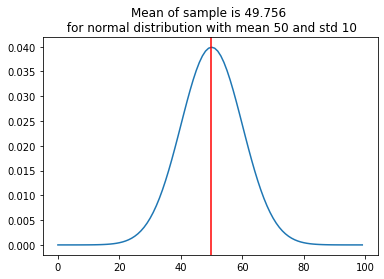

In [123]:
MEAN = 50
STD = 10
SIZE = 1001

sample = np.random.normal(MEAN, STD, SIZE)
est_mean = np.round(np.mean(sample), 3)
my_mean = np.round(mean(sample), 3)
assert est_mean == my_mean

x = np.arange(0, 100)
_pdf = norm.pdf(x, MEAN, STD)

plt.plot(x, _pdf)
plt.axvline(est_mean, color='r')
plt.title(f'Mean of sample is {est_mean} \n for normal distribution with mean {MEAN} and std {STD}')
plt.show()

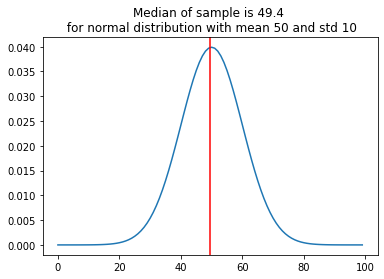

In [124]:
MEDIAN = np.round(np.median(sample), 3)
MY_MEDIAN = np.round(median(sample), 3)

assert MEDIAN == MY_MEDIAN
x = np.arange(0, 100)
_pdf = norm.pdf(x, MEAN, STD)

plt.plot(x, _pdf)
plt.axvline(MEDIAN, color='r')
plt.title(f'Median of sample is {MEDIAN} \n for normal distribution with mean {MEAN} and std {STD}')
plt.show()

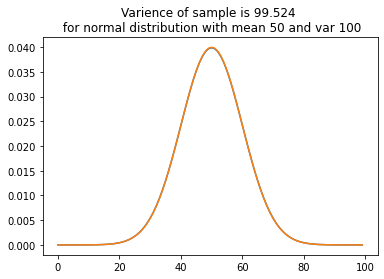

In [125]:
VARIENCE = np.round(np.var(sample, ddof=1), 3)
MY_VARIENCE = np.round(varience(sample), 3)

assert VARIENCE == MY_VARIENCE


plt.plot(x, _pdf)
plt.plot(x, norm.pdf(x, MEAN, np.sqrt(MY_VARIENCE)))

plt.title(f'Varience of sample is {VARIENCE} \n for normal distribution with mean {MEAN} and var {STD**2}')
plt.show()

Mean: 5.0, VAR: 2.5, Mode: 5.0 , as (n+1)p: 5.5


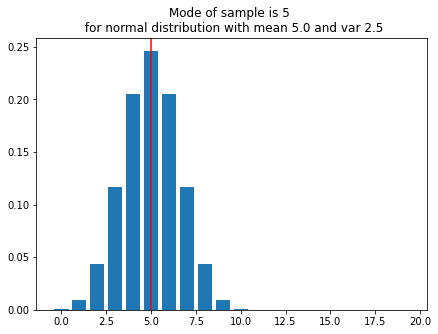

In [126]:
from scipy.stats import mode as scypi_mode
from scipy.stats import binom

N=10
p=0.5
SIZE=100

print(f'Mean: {N*p}, VAR: {N*p*(1-p)}, Mode: {np.floor((N+1)*p)} , as (n+1)p: {(N+1)*p}')
    
bin_sample = np.random.binomial(N, p, 100)

MODE = np.round(scypi_mode(bin_sample), 3)[0][0]
MY_MODE_NUMPY = np.round(_mode(bin_sample), 3)
MY_MODE_PYTHON = np.round(_mode(bin_sample, numpy=False), 3)


assert MY_MODE_NUMPY == MY_MODE_NUMPY
assert MODE == MY_MODE_NUMPY

x = np.arange(20)
plt.figure(figsize=(7, 5))
plt.bar(x, binom.pmf(x, N, p))

plt.title(f'Mode of sample is {MODE} \n for normal distribution with mean {N*p} and var {N*p*(1-p)}')
plt.axvline(MODE, color='r')
plt.show()

# Percentile

Percentile is a k-th percentile, also known as percentile score or centile, is a score below which a given percentage k of scores in its frequency distribution falls ("exclusive" definition) or a score at or below which a given percentage falls ("inclusive" definition). Percentiles are expressed in the same unit of measurement as the input scores, not in percent;

```N-й перцентиль - это такое число, что N% элементов массива меньше или равны этому числу
или чуть короче
X - это N-й перцентиль, если N% элементов массива <= X
```


# Quantiles
**quantiles** are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way. There is one fewer quantile than the number of groups created. Common quantiles have special names, such as quartiles (four groups), deciles (ten groups), and percentiles (100 groups). 

![quartiles](quartiles.png)

In [144]:
import math

def percentile(arr, n):
    k = (len(arr)-1) * n
    f = math.floor(k)
    c = math.ceil(k)
    if f==c:
        return arr[int(k)]
    
    d0 = arr[int(f)] * (c-k)    
    d1 = arr[int(c)] * (k-f)
    return d0+d1

Median  50.0 50.0
50% percentile  50.0  or  50.0  or  50.0


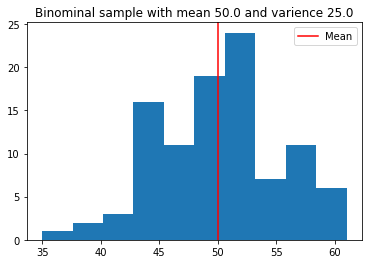

In [200]:
np.random.seed(0)

bin_sample = np.random.binomial(N, p, 100)

print('Median ', np.round(N*p), median(bin_sample))
print('50% percentile ', percentile(bin_sample, 0.5), ' or ', np.quantile(bin_sample, 0.5), ' or ', np.percentile(bin_sample, 50))



plt.hist(bin_sample)
plt.title(f'Binominal sample with mean {N*p} and varience {N*p*(1-p)}')
plt.axvline(N*p, color='r', label='Mean')
plt.legend()
plt.show()


# Discrete Probability Distribution

![discreate_distr](discreate_distr.png)

In [192]:
def statistics(sample, _mean, _var, dist):
    print('DISTRIBUTION: ' + dist)
    print(f'Theoretical mean: {round(_mean, 3)}, theoretical varience: {round(_var, 3)}')
    print(f'Empirical mean: {round(mean(sample), 3)}, empircal varience: {round(varience(sample), 3)}')
    print()

In [213]:
N = 100
SIZE=1000
p=0.4
_lambda = 5
np.random.seed(1)

# dicrete uniform distribution
disc_unif_sample = np.random.randint(0, N, size=SIZE)

_mean = (N + 1) / 2
_var = (N**2 - 1) / 12
statistics(disc_unif_sample, _mean, _var, 'discrete uniform' )

# bernoulli
bern_sample = np.random.binomial(1, p, SIZE)
_mean = p
_var = p*(1-p)
statistics(bern_sample, _mean, _var, 'bernoulli' )

# binominal 
bin_sample = np.random.binomial(N, p, SIZE)
_mean = N*p
_var = N*p*(1-p)
statistics(bin_sample, _mean, _var, 'binominal' )

# poisson 
pois_sample = np.random.poisson(_lambda, SIZE)
_mean = _lambda
_var = _lambda
statistics(pois_sample, _mean, _var, 'poisson' )


# geometric
geam_sample = np.random.geometric(p, SIZE)
_mean = 1 / p
_var = (1 - p) / p**2
statistics(geam_sample, _mean, _var, 'geometric' )


DISTRIBUTION: discrete uniform
Theoretical mean: 50.5, theoretical varience: 833.25
Empirical mean: 49.074, empircal varience: 829.746

DISTRIBUTION: bernoulli
Theoretical mean: 0.4, theoretical varience: 0.24
Empirical mean: 0.404, empircal varience: 0.241

DISTRIBUTION: binominal
Theoretical mean: 40.0, theoretical varience: 24.0
Empirical mean: 40.049, empircal varience: 23.923

DISTRIBUTION: poisson
Theoretical mean: 5, theoretical varience: 5
Empirical mean: 5.027, empircal varience: 4.709

DISTRIBUTION: geometric
Theoretical mean: 2.5, theoretical varience: 3.75
Empirical mean: 2.578, empircal varience: 3.954



# Uniform Probability Distribution
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9

# Law of Large Numbers

We can think of a trial of an experiment as one observation. The standalone and independent
repetition of the experiment will perform multiple trials and lead to multiple observations. All
sample observations for an experiment are drawn from an idealized population of observations.

1. Observation: Result from one trial of an experiment.

2. Sample: Group of results gathered from separate independent trials.

3. Population: Space of all possible observations that could be seen from a trial.

It is important to be clear that the observations in the sample must be independent

### As we increase the sample size, the finding or mean of the sample will move back toward the population mean, back toward the true underlying expected value.

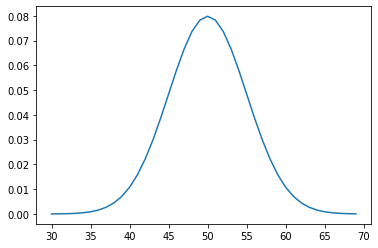

In [87]:
x = np.arange(30, 70)
_pdf = norm.pdf(x, 50, 5)

plt.plot(x, _pdf)
plt.show()

Now, we can pretend to forget everything that we know about the population and make independent random samples from the population. We expect that as the
size of the sample is increased, the sample mean will better approximate the population mean.

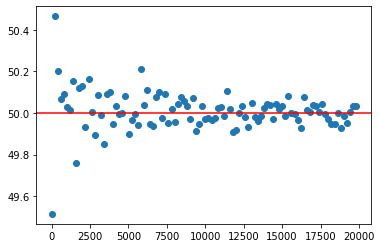

In [7]:
np.random.seed(1)
sizes = list(range(10, 20000, 200))

# generate samples of different sizes and calculate their means
means =  [np.mean(5 * np.random.randn(size) + 50) for size in sizes]

plt.scatter(sizes, means)
plt.axhline(50, color='r')

# Central Limit Theorem


### The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.

Worked Example with Dice


mathematical expectation 3.5

Single experiment
mean of the sample 3.92



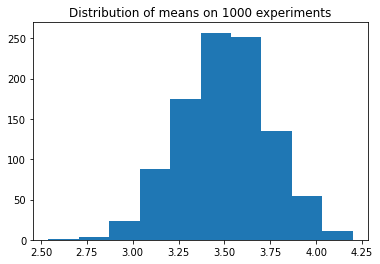

In [102]:
E = np.mean(range(1, 7))
print('mathematical expectation', E)
print()

print('Single experiment')
rolls = np.random.randint(1, 7, 50)
print('mean of the sample', np.mean(rolls))
print()


sampled_means = [np.mean(np.random.randint(1, 7, 50)) for _ in range(1000)]
plt.hist(sampled_means)

plt.title('Distribution of means on 1000 experiments')
plt.show()

## Resources used

Statistical Methods for Machine Learning. Discover How to Transform Data into Knowledge with Python (Brownlee) 1,4 ed (2019)